## Python for data analysis (R users pay attention)

### How does climate affect prosperity?

We will look at the effect of climate through a proxy vatriable, the latitude. Prosperity will be measured by GDP per capita.

 * Look at GDP data for a number of cities around the world
 * Get the population and the latitude data for these cities
 * Compute the GDP per capita for each city
 * plot GDP per capita data against the latitude of each city

#### Reading data and down selecting

In [1]:
import pandas 
gdp = pandas.read_csv('https://raw.githubusercontent.com/pletzer/jupyterMoons/master/citiesGDP.csv')

In [2]:
mytext = " hello world"

In [5]:
# how many rows and columns in the table?
print(gdp.shape)
print(len(gdp))

(151, 4)
151


In [7]:
gdp.head(10)

,Rank,City/Urban area,Country,GDP in US$bn 2005
0,1,Tokyo,Japan,1191
1,2,New York,USA,1133
2,3,Los Angeles,USA,639
3,4,Chicago,USA,460
4,5,Paris,France,460
5,6,London,UK,452
6,7,Osaka/Kobe,Japan,341
7,8,Mexico City,Mexico,315
8,9,Philadelphia,USA,312
9,10,Washington DC,USA,299


In [8]:
# show the title of each column
gdp.columns

Index(['Rank', 'City/Urban area', 'Country', 'GDP in US$bn 2005'], dtype='object')

In [16]:
# select columns
gdp.loc[0:10, ['City/Urban area', 'GDP in US$bn 2005']]


,City/Urban area,GDP in US$bn 2005
0,Tokyo,1191
1,New York,1133
2,Los Angeles,639
3,Chicago,460
4,Paris,460
5,London,452
6,Osaka/Kobe,341
7,Mexico City,315
8,Philadelphia,312
9,Washington DC,299


In [22]:
# select the cities for which the GDP > $1000bn

In [17]:
# read geographic data 
geo = pandas.read_csv('https://raw.githubusercontent.com/pletzer/swc-python-data/master/world_cities.csv')

In [18]:
geo.shape

(7322, 9)

In [19]:
geo.head(5)

,city,city_ascii,lat,lng,pop,country,iso2,iso3,province
0,Qal eh-ye Now,Qal eh-ye,34.983000,63.133300,2997.0,Afghanistan,AF,AFG,Badghis
1,Chaghcharan,Chaghcharan,34.516701,65.250001,15000.0,Afghanistan,AF,AFG,Ghor
2,Lashkar Gah,Lashkar Gah,31.582998,64.360000,201546.0,Afghanistan,AF,AFG,Hilmand
3,Zaranj,Zaranj,31.112001,61.886998,49851.0,Afghanistan,AF,AFG,Nimroz
4,Tarin Kowt,Tarin Kowt,32.633298,65.866699,10000.0,Afghanistan,AF,AFG,Uruzgan


In [23]:
# remove some columns
geo.columns
geo.drop(['lng', 'iso2', 'iso3', 'province', 'city'], inplace=True, axis=1)

ValueError: labels ['lng' 'iso2' 'iso3' 'province' 'city'] not contained in axis

In [24]:
geo.head(5)

,city_ascii,lat,pop,country
0,Qal eh-ye,34.983000,2997.0,Afghanistan
1,Chaghcharan,34.516701,15000.0,Afghanistan
2,Lashkar Gah,31.582998,201546.0,Afghanistan
3,Zaranj,31.112001,49851.0,Afghanistan
4,Tarin Kowt,32.633298,10000.0,Afghanistan


In [25]:
# get the new number of columns
geo.shape

(7322, 4)

### Table indexing

In [27]:
# show the first row
geo.loc[0, :]

city_ascii      Qal eh-ye
lat                34.983
pop                  2997
country       Afghanistan
Name: 0, dtype: object

In [28]:
# display the city of the first row
geo.loc[0, 'city_ascii']

'Qal eh-ye'

### Masking

In [35]:
# list the cities in New Zealand with more than 100000 inhabitants
mask = (geo.loc[:, 'country'] == 'New Zealand')
df = geo.loc[mask, ['city_ascii', 'pop']]
df.shape

(33, 2)

In [37]:
# sort the NZ cities by population
df.sort_values('pop', ascending=False).head(5)

,city_ascii,pop
4294,Auckland,759510.0
4288,Manukau,336141.5
4292,Wellington,296300.0
4293,Christchurch,295351.5
4267,Takapuna,184815.5


### clean up the data

In [38]:
# get all the cities named "London"
m = geo.loc[:, 'city_ascii'] == 'London'
geo.loc[m, ['city_ascii', 'country']]

,city_ascii,country
1322,London,Canada
6302,London,United Kingdom
6442,London,United States of America


In [40]:
# get all the cities named "Portland"
geo.loc[geo.loc[:, 'city_ascii'] == 'Portland', ['city_ascii', 'country', 'pop']]

,city_ascii,country,pop
574,Portland,Australia,10324.5
6946,Portland,United States of America,99504.0
7022,Portland,United States of America,1207756.5


In [41]:
# remove some rows in the datasets
geo.drop([1322, 6442, 574, 6946], axis=0, inplace=True)

In [46]:
# check that London and Portland appear only once
m1 = (geo.loc[:, 'city_ascii'] == 'London') 
m2 = (geo.loc[:, 'city_ascii'] == 'Portland')
m = m1 | m2
geo.loc[m, ['city_ascii', 'country']]

,city_ascii,country
6302,London,United Kingdom
7022,Portland,USA


In [47]:
# replace 'United States of America' -> 'USA'
# replace 'United Kingdom' -> 'UK'
m1 = geo.loc[:, 'country'] == 'United States of America'
m2 = geo.loc[:, 'country'] == 'United Kingdom'
geo.loc[m1, 'country'] = 'USA'
geo.loc[m2, 'country'] = 'UK'


In [51]:
(geo.loc[:, 'country'] == 'United States of America').sum()

0

In [52]:
(geo.loc[:, 'country'] == 'United Kingdom').sum()

0

### Merging tables

In [53]:
# combine the two tables
# merge the data frames on city and country
print(gdp.columns)
print(geo.columns)

Index(['Rank', 'City/Urban area', 'Country', 'GDP in US$bn 2005'], dtype='object')
Index(['city_ascii', 'lat', 'pop', 'country'], dtype='object')


In [54]:
df = pandas.merge(gdp, geo, left_on=['City/Urban area', 'Country'], 
                  right_on=['city_ascii', 'country'])

In [56]:
df.shape

(128, 8)

In [60]:
# calculate GDP per capita
df['GDPperCap'] = df['GDP in US$bn 2005'] * 1e9 / df['pop']
df.sort_values('GDPperCap', ascending=False).head()

,Rank,City/Urban area,Country,GDP in US$bn 2005,city_ascii,lat,pop,country,GDPperCap
8,11,Boston,USA,290,Boston,42.329960,2528070.5,USA,114711.990825
22,28,Minneapolis,USA,155,Minneapolis,44.979979,1491886.5,USA,103895.303027
18,24,Seattle,USA,186,Seattle,47.570002,1821684.5,USA,102103.300544
10,16,Atlanta,USA,236,Atlanta,33.830014,2464454.0,USA,95761.576398
4,5,Paris,France,460,Paris,48.866693,4957588.5,France,92787.047574


In [61]:
# show cities with GDP per capita > $50k
m = df.loc[:, 'GDPperCap'] > 50000
df.loc[m, 'city_ascii']

0            Tokyo
1         New York
2      Los Angeles
3          Chicago
4            Paris
5           London
7     Philadelphia
8           Boston
10         Atlanta
11         Houston
12           Miami
16         Detroit
17          Madrid
18         Seattle
21         Phoenix
22     Minneapolis
23       San Diego
27       Melbourne
29          Denver
32            Rome
33           Milan
34       Baltimore
42       Cleveland
45        Portland
47      Pittsburgh
50       Vancouver
53       Stockholm
59      Manchester
65            Lyon
75        Helsinki
78          Zurich
81        Auckland
90          Prague
Name: city_ascii, dtype: object

### Visualize

In [77]:
m = (df.loc[:, 'city_ascii'] == 'Auckland') | (df.loc[:, 'city_ascii'] == 'Melbourne')
df.loc[m, ['lat', 'GDPperCap']]


,lat,GDPperCap
27,-37.820031,63326.394793
81,-36.850013,53982.172717


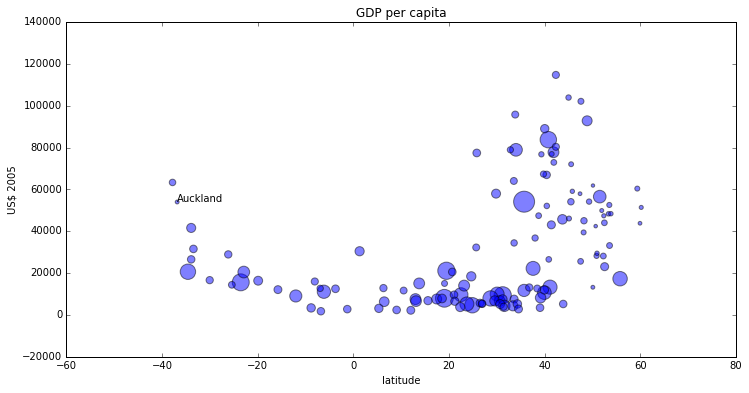

In [76]:
# create scatter plot with size of population
% matplotlib inline
from matplotlib import pylab
# nicer plot size
pylab.rcParams['figure.figsize'] = (12, 6)
#pylab.rcParams['font'] = {'family' : 'normal',
#        'weight' : 'normal', 'size'   : 18}

#lats = df.loc[:, 'lat']
lats = df['lat']
gdpPerCap = df['GDPperCap']
pylab.scatter(df['lat'], gdpPerCap, s=df['pop']/50000, alpha=0.5)
pylab.title('GDP per capita')
pylab.xlabel('latitude')
pylab.ylabel('US$ 2005')

pylab.annotate('Auckland', xy=(-36.850013, 53982.172717))

pylab.show()